# Nivell 1
- Exercici 1

Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.

In [1]:
# importing required values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
# read the train data
train_data = pd.read_csv('train.csv')

# check for the null values
train_data.isna().mean()

Row ID           0.000000
Order ID         0.000000
Order Date       0.000000
Ship Date        0.000000
Ship Mode        0.000000
Customer ID      0.000000
Customer Name    0.000000
Segment          0.000000
Country          0.000000
City             0.000000
State            0.000000
Postal Code      0.001122
Region           0.000000
Product ID       0.000000
Category         0.000000
Sub-Category     0.000000
Product Name     0.000000
Sales            0.000000
dtype: float64

I have only 11 null values, I´ll drop them

In [3]:
train_data.dropna(inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9789 non-null   int64  
 1   Order ID       9789 non-null   object 
 2   Order Date     9789 non-null   object 
 3   Ship Date      9789 non-null   object 
 4   Ship Mode      9789 non-null   object 
 5   Customer ID    9789 non-null   object 
 6   Customer Name  9789 non-null   object 
 7   Segment        9789 non-null   object 
 8   Country        9789 non-null   object 
 9   City           9789 non-null   object 
 10  State          9789 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9789 non-null   object 
 13  Product ID     9789 non-null   object 
 14  Category       9789 non-null   object 
 15  Sub-Category   9789 non-null   object 
 16  Product Name   9789 non-null   object 
 17  Sales          9789 non-null   float64
dtypes: float

In [4]:
train_data.drop(columns=['Order ID','Row ID','Order Date', 'Ship Date','Country', 'Customer ID','Customer Name','Product Name','Postal Code','Product ID'],inplace=True)

In [5]:
train_data.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales'],
      dtype='object')

In [6]:
train_data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680


In [7]:
top_city=(train_data['City'].value_counts().head(20)).index.to_list()
train_data["City"]=train_data["City"].apply(lambda x: x if x in top_city else "Other")
train_data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales
0,Second Class,Consumer,Other,Kentucky,South,Furniture,Bookcases,261.9600
1,Second Class,Consumer,Other,Kentucky,South,Furniture,Chairs,731.9400
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200
3,Standard Class,Consumer,Other,Florida,South,Furniture,Tables,957.5775
4,Standard Class,Consumer,Other,Florida,South,Office Supplies,Storage,22.3680


In [8]:
top_city

['New York City',
 'Los Angeles',
 'Philadelphia',
 'San Francisco',
 'Seattle',
 'Houston',
 'Chicago',
 'Columbus',
 'San Diego',
 'Springfield',
 'Dallas',
 'Jacksonville',
 'Detroit',
 'Newark',
 'Jackson',
 'Columbia',
 'Richmond',
 'Aurora',
 'Phoenix',
 'Arlington']

In [9]:
import category_encoders as ce
# create an object of the OneHotEncoder
OHE = ce.OneHotEncoder()
# encode the categorical variables
_data=pd.DataFrame(OHE.fit_transform(train_data[['Ship Mode', 'Segment','State', 'Region', 'Category', 'Sub-Category','City']]))
# merge with main df bridge_df on key values
train_data = train_data.join(_data)
train_data

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Ship Mode_1,Ship Mode_2,...,City_12,City_13,City_14,City_15,City_16,City_17,City_18,City_19,City_20,City_21
0,Second Class,Consumer,Other,Kentucky,South,Furniture,Bookcases,261.9600,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Second Class,Consumer,Other,Kentucky,South,Furniture,Chairs,731.9400,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Standard Class,Consumer,Other,Florida,South,Furniture,Tables,957.5775,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Standard Class,Consumer,Other,Florida,South,Office Supplies,Storage,22.3680,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,Standard Class,Corporate,Chicago,Illinois,Central,Office Supplies,Binders,3.7980,0,1,...,0,0,0,0,0,0,0,0,0,0
9796,Standard Class,Corporate,Other,Ohio,East,Office Supplies,Art,10.3680,0,1,...,0,0,0,0,0,0,0,0,0,0
9797,Standard Class,Corporate,Other,Ohio,East,Technology,Phones,235.1880,0,1,...,0,0,0,0,0,0,0,0,0,0
9798,Standard Class,Corporate,Other,Ohio,East,Technology,Phones,26.3760,0,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train_data.drop(columns=['Ship Mode', 'Segment','State', 'Region', 'Category', 'Sub-Category','City'], inplace=True)

In [11]:
train_data.head()

,Sales,Ship Mode_1,Ship Mode_2,Ship Mode_3,Ship Mode_4,Segment_1,Segment_2,Segment_3,State_1,State_2,...,City_12,City_13,City_14,City_15,City_16,City_17,City_18,City_19,City_20,City_21
0,261.9600,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,731.9400,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,14.6200,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,957.5775,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22.3680,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# importing libraries
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# separate the independent and target variable 
train_X = train_data.drop(columns=['Sales'])
train_Y = train_data['Sales']

# randomly split the data
train_x, test_x, train_y, test_y = train_test_split(train_X, train_Y,test_size=0.25,random_state=0)

# shape of train and test splits
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((7341, 100), (2448, 100), (7341,), (2448,))

In [13]:
train_data

,Sales,Ship Mode_1,Ship Mode_2,Ship Mode_3,Ship Mode_4,Segment_1,Segment_2,Segment_3,State_1,State_2,...,City_12,City_13,City_14,City_15,City_16,City_17,City_18,City_19,City_20,City_21
0,261.9600,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,731.9400,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,14.6200,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,957.5775,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22.3680,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,3.7980,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9796,10.3680,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9797,235.1880,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9798,26.3760,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# create an object of the RandomForestRegressor
model_RFR = RandomForestRegressor(max_depth=10)

# fit the model with the training data
model_RFR.fit(train_x, train_y)

# predict the target on train and test data
predict_train = model_RFR.predict(train_x)
predict_test = model_RFR.predict(test_x)

# Root Mean Squared Error on train and test data
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))

RMSE on train data:  435.559042306295
RMSE on test data:  610.8373303488651


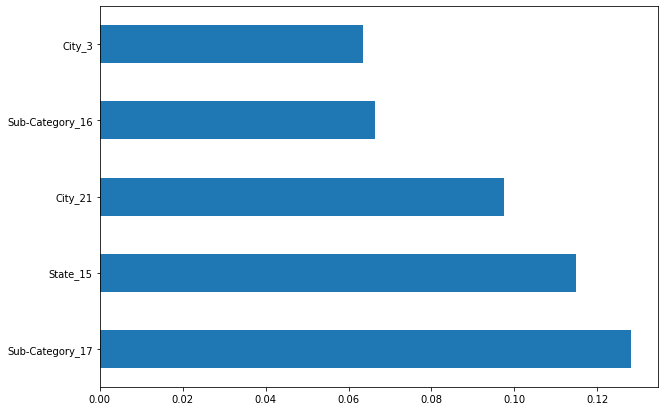

In [20]:
# plot the 7 most important features 
plt.figure(figsize=(10,7))
feat_importances = pd.Series(model_RFR.feature_importances_, index = train_x.columns)
feat_importances.nlargest(5).plot(kind='barh');

In [21]:
# training data with 7 most important features 'Category'!!!!!!!!!!!!!!!!!!!!!!!
train_x_if = train_x[['Sub-Category_17','State_15', 'City_21', 'City_3','Sub-Category_16','Category_2','Sub-Category_17']]
# test data with 7 most important features
test_x_if = test_x[['Sub-Category_17','State_15', 'City_21', 'City_3','Sub-Category_16','Category_2','Sub-Category_17']]

# create an object of the RandfomForestRegressor Model
model_RFR_with_if = RandomForestRegressor(max_depth=10,random_state=2)

# fit the model with the training data
model_RFR_with_if.fit(train_x_if, train_y)

# predict the target on the training and test data
predict_train_with_if = model_RFR_with_if.predict(train_x_if)
predict_test_with_if = model_RFR_with_if.predict(test_x_if)

# Root Mean Squared Error on the train and test data
print('RMSE on train data: ', mean_squared_error(train_y, predict_train_with_if)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test_with_if)**(0.5))

RMSE on train data:  529.8174586702029
RMSE on test data:  623.7172928421276


**PIPELINE**

In [83]:
# importing required libraries
import pandas as pd
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# read the training data set
data = pd.read_csv('train.csv')

# top rows of the data
data.head()
data.drop(columns=['Order ID','Row ID','Order Date', 'Ship Date','Country', 'Customer ID','Customer Name','Product Name','Postal Code','Product ID'],inplace=True)
# seperate the independent and target variables
train_X1 = data.drop(columns=['Sales'])
train_Y1 = data['Sales']

# randomly split the data
train_x1, test_x1, train_y1, test_y1 = train_test_split(train_X1, train_Y1,test_size=0.25,random_state=42)

# shape of train and test splits
train_x1.shape, test_x1.shape, train_y1.shape, test_y1.shape

((7350, 7), (2450, 7), (7350,), (2450,))

In [70]:
# import the BaseEstimator
from sklearn.base import BaseEstimator

# define the class OutletTypeEncoder
# This will be our custom transformer that will create 3 new binary columns
# custom transformer must have methods fit and transform
class OutletTypeEncoder(BaseEstimator):

    def __init__(self):
        pass

    def fit(self, documents, y=None):
        return self

    def transform(self, x_dataset):
        x_dataset['Sub-Category_17'] = (x_dataset['Sub-Category'] =='Copiers')*1
        x_dataset['Sub-Category_16'] = (x_dataset['Sub-Category'] =='Machines')*1
        x_dataset['State_15'] = (x_dataset['State'] == 'Indiana')*1
        x_dataset['City_21'] = (x_dataset['City'] == 'Other')*1
        x_dataset['City_3'] = (x_dataset['City'] == 'Philadelphia')*1
        
        col=['Ship Mode','Segment','State', 'Region', 'Category', 'Sub-Category','City']
       # if set(col).issubset(x_dataset.columns):
        #    x_dataset=pd.DataFrame(OHE.fit_transform(x_dataset[col]))
        return x_dataset   


In [84]:
# pre-processsing step
# Drop the columns - 
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[('drop_columns', 'drop', ['Ship Mode', 'Segment','State', 'Region', 'Category', 'Sub-Category','City'
                                                                       ]),
                                                          ])

In [85]:
# Define the Pipeline
model_pipeline = Pipeline(steps=[('get_outlet_binary_columns', OutletTypeEncoder()), 
                                 ('pre_processing',pre_process),
                                 ('random_forest', RandomForestRegressor())
                                 ])

**Grid Search**

In [134]:
param_grid = { 
    'random_forest__max_depth' :[8,10,12],
    'random_forest__random_state': [6,8,10,12,14,16,42],
    }
grid = GridSearchCV(model_pipeline, param_grid = param_grid, cv = 5)
grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('get_outlet_binary_columns',
                                        OutletTypeEncoder()),
                                       ('pre_processing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('drop_columns',
                                                                         'drop',
                                                                         ['Ship '
                                                                          'Mode',
                                                                          'Segment',
                                                                          'State',
                                                                          'Region',
                                                                          'Category',
                                     

In [135]:
grid.fit(train_x1, train_y1)

print( "score = %3.2f" %(grid.score(test_x1, test_y1)))

print(grid.best_estimator_)

score = 0.14
Pipeline(steps=[('get_outlet_binary_columns', OutletTypeEncoder()),
                ('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['Ship Mode', 'Segment',
                                                   'State', 'Region',
                                                   'Category', 'Sub-Category',
                                                   'City'])])),
                ('random_forest',
                 RandomForestRegressor(max_depth=8, random_state=8))])


In [136]:
# Pipeline with the best parametrs

model_pipeline = Pipeline(steps=[('get_outlet_binary_columns', OutletTypeEncoder()), 
                                 ('pre_processing',pre_process),
                                 ('random_forest', RandomForestRegressor(max_depth=8,random_state=8))
                                 ])

# fit the pipeline with the training data
model_pipeline.fit(train_x1,train_y1)

Pipeline(steps=[('get_outlet_binary_columns', OutletTypeEncoder()),
                ('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['Ship Mode', 'Segment',
                                                   'State', 'Region',
                                                   'Category', 'Sub-Category',
                                                   'City'])])),
                ('random_forest',
                 RandomForestRegressor(max_depth=8, random_state=8))])

In [137]:
# predict target values on the training data
model_pipeline.predict(test_x1)

array([196.80686531, 196.80686531, 196.80686531, ..., 196.80686531,
       196.80686531, 196.80686531])

# - Exercici 2

Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules

In [138]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string
from nltk.corpus import stopwords
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

The text about Tarragona from Wikipedia

In [140]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\natas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [141]:
with open('tarragona.txt', encoding='utf8') as infile:
    text=infile.read()
    tokenized_word=word_tokenize(text.lower())
    #Remover puntuacion
    tokenized_word = [word for word in tokenized_word if word not in string.punctuation]
    fdist = FreqDist(tokenized_word)
    print(fdist)
    

<FreqDist with 901 samples and 2186 outcomes>


In [142]:
print(fdist.most_common(30))

[('the', 219), ('of', 123), ('and', 67), ('in', 46), ('a', 40), ('was', 35), ('tarragona', 31), ('it', 31), ('is', 27), ('by', 27), ('to', 22), ('city', 21), ('roman', 15), ('on', 14), ('for', 12), ('as', 12), ('from', 11), ('which', 11), ('are', 11), ('an', 10), ('or', 9), ('its', 9), ('de', 9), ('with', 8), ('during', 8), ('war', 8), ('spanish', 8), ('plaça', 8), ('mediterranean', 7), ('called', 7)]


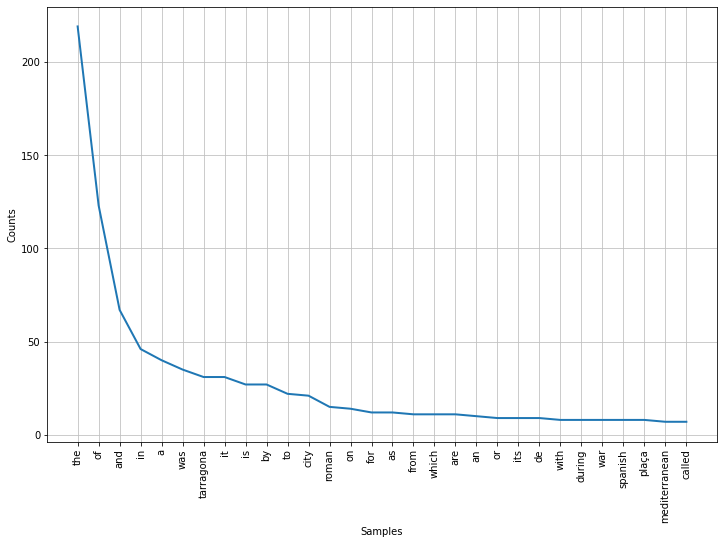

In [143]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
fdist.plot(30,cumulative=False)
plt.show()

# Nivell 2
Exercici 1 Treu les stopwords i realitza stemming al teu conjunt de dades.

In [145]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [146]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{'re', 'mustn', 'll', 'am', "you've", 'o', "aren't", "you're", 'what', 'no', 'have', 'about', 'don', 'because', 'if', 'both', 'was', 'me', "mustn't", 'herself', 'whom', 'an', 'after', 'should', 'his', 'against', 'again', 'too', 'mightn', "it's", 'does', 'your', 'being', 'at', "don't", 'once', 'ain', 'of', "shouldn't", 'but', 'and', 'wouldn', 'their', "mightn't", 'up', 'same', 'they', 'my', 'hers', 'from', "wouldn't", "weren't", 'that', 'were', 'other', 'before', 'not', 'now', 'haven', 'then', 'didn', 'her', 'down', 'to', 'ma', "she's", "hadn't", "needn't", 'did', 'in', 'so', 'under', "wasn't", 'shan', 'doesn', 'these', "that'll", 'do', 'them', 'd', 'each', 'themselves', 'here', 'hasn', 've', 'has', 'y', 'with', "didn't", 'on', 'will', 'couldn', "you'd", 'having', 'where', 'himself', 'is', 'itself', "should've", 'how', 'this', 'as', 'during', 'few', 'hadn', 'shouldn', 'who', 'below', 's', 'by', 'it', 'when', 'than', 'ourselves', "hasn't", 'isn', 'weren', "won't", 'between', 'are', 'any'

In [147]:
#removing Stopwords
tokenized_word = [word for word in tokenized_word if word not in stop_words]

In [148]:
#Stemming
ps = PorterStemmer()

stemmed_words=[]
for w in tokenized_word:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",tokenized_word)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['tarragona', 'port', 'city', 'located', 'northeast', 'spain', 'costa', 'daurada', 'mediterranean', 'sea', 'founded', '5th', 'century', 'bc', 'capital', 'province', 'tarragona', 'part', 'tarragonès', 'catalonia', 'geographically', 'bordered', 'north', 'province', 'barcelona', 'province', 'lleida', 'city', 'population', '201,199', '2014', 'origins', 'one', 'catalan', 'legend', 'holds', 'tarragona', 'named', 'tarraho', 'eldest', 'son', 'tubal', 'c.', '2407', 'bc', 'another', 'derived', 'strabo', 'megasthenes', 'attributes', 'name', "'tearcon", 'ethiopian', '7th-century', 'bc', 'pharaoh', 'campaigned', 'spain', '3', 'real', 'founding', 'date', 'tarragona', 'unknown', 'city', 'may', 'begun', 'iberian', 'town', 'called', 'kesse', 'kosse', 'named', 'iberian', 'tribe', 'region', 'cossetans', 'though', 'identification', 'tarragona', 'kesse', 'certain', '4', 'william', 'smith', 'suggests', 'city', 'probably', 'founded', 'phoenicians', 'called', 'tarchon', 'according', 'samuel

In [152]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\natas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\natas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


True

In [153]:
#Lexicon Normalization
#performing stemming and Lemmatization

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: fly
Stemmed Word: fli


In [154]:
fdist_new = FreqDist(tokenized_word)
print(fdist_new.most_common(30))

[('tarragona', 31), ('city', 21), ('roman', 15), ('de', 9), ('war', 8), ('spanish', 8), ('plaça', 8), ('mediterranean', 7), ('called', 7), ('near', 7), ('del', 7), ('century', 6), ('part', 6), ('town', 6), ('tarraco', 6), ('first', 6), ('empire', 6), ('captured', 6), ('aragon', 6), ('spain', 5), ('sea', 5), ('province', 5), ('catalan', 5), ('named', 5), ('``', 5), ("''", 5), ('amphitheatre', 5), ('coast', 5), ("'s", 5), ('french', 5)]


# Nivell 3
Exercici 1 Realitza sentiment analysis al teu conjunt de dades.

In [156]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\natas\AppData\Roaming\nltk_data...


True

In [157]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(text)

{'neg': 0.048, 'neu': 0.898, 'pos': 0.054, 'compound': 0.6223}